In [1]:
import xarray as xr
import gcsfs
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

We will use [xbatcher](https://xbatcher.readthedocs.io/en/latest/), a new library we are developing to help with xarray -> deep learning pipelines.

## CESM Ocean GCM Dataset

We will use data from a high-resolution CESM POP ocean model simulation. 

In [3]:
import intake
cat_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml'
cat = intake.Catalog(cat_url)
ds = cat.ocean.CESM_POP.CESM_POP_hires_control.to_dask()
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/fsspec/implementations/local.py:32: FutureWarning: The default value of auto_mkdir=True has been deprecated and will be changed to auto_mkdir=False by default in a future release.
  FutureWarning,


<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 ...
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cp_air              float64 ...
    cp_sw               float64 ...
    days_in_norm_year   timedelta64[ns] ...
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    fwflux_factor       float64 ...
    grav                float64 ...
    heat_to_PW          float64 ...
    hflux_factor        float64 ...
    latent_heat_fusion  float64 ...
    latent_heat_vapor   float64 ...
    mass_to_Sv          float64 ...
    momentum_factor     float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    ocn_ref_salinity    float64 ...
    omega               float64 ...
    ppt_to_salt         float64 ...
    radius              float64 ...
    rho_air             float64 ...
    rho_fw              float64 ...
    rho_sw              float64 ...
    salinity_factor     float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    salt_to_ppt         float64 ...
    sea_ice_salinity    float64 ...
    sflux_factor        float64 ...
    sound               float64 ...
    stefan_boltzmann    float64 ...
  * time                (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2              (time,

In [4]:
ds = ds.rename({'U1_1':'U', 'V1_1':'V', 'TAUX_2':'TAUX', 'TAUY_2':'TAUY', 'SSH_2':'SSH', 'ULONG':'XU', 'ULAT':'YU'})
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 ...
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    YU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    XU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cp_air              float64 ...
    cp_sw               float64 ...
    days_in_norm_year   timedelta64[ns] ...
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    fwflux_factor       float64 ...
    grav                float64 ...
    heat_to_PW          float64 ...
    hflux_factor        float64 ...
    latent_heat_fusion  float64 ...
    latent_heat_vapor   float64 ...
    mass_to_Sv          float64 ...
    momentum_factor     float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    ocn_ref_salinity    float64 ...
    omega               float64 ...
    ppt_to_salt         float64 ...
    radius              float64 ...
    rho_air             float64 ...
    rho_fw              float64 ...
    rho_sw              float64 ...
    salinity_factor     float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    salt_to_ppt         float64 ...
    sea_ice_salinity    float64 ...
    sflux_factor        float64 ...
    sound               float64 ...
    stefan_boltzmann    float64 ...
  * time                (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2              (time,

In [5]:
def make_3d_coords(lon,lat):
    X = np.sin(np.radians(lat))
    Y = np.sin(np.radians(lon))*np.cos(np.radians(lat))
    Z = -np.cos(np.radians(lon))*np.cos(np.radians(lat))
    return (X,Y,Z)

X, Y, Z = make_3d_coords(ds.XU.data, ds.YU.data)
ds['X'] = ds.XU.dims, X
ds['Y'] = ds.XU.dims, Y
ds['Z'] = ds.XU.dims, Z
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 ...
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    YU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    XU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cp_air              float64 ...
    cp_sw               float64 ...
    days_in_norm_year   timedelta64[ns] ...
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    fwflux_factor       float64 ...
    grav                float64 ...
    heat_to_PW          float64 ...
    hflux_factor        float64 ...
    latent_heat_fusion  float64 ...
    latent_heat_vapor   float64 ...
    mass_to_Sv          float64 ...
    momentum_factor     float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    ocn_ref_salinity    float64 ...
    omega               float64 ...
    ppt_to_salt         float64 ...
    radius              float64 ...
    rho_air             float64 ...
    rho_fw              float64 ...
    rho_sw              float64 ...
    salinity_factor     float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    salt_to_ppt         float64 ...
    sea_ice_salinity    float64 ...
    sflux_factor        float64 ...
    sound               float64 ...
    stefan_boltzmann    float64 ...
  * time                (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2              (time,

In [6]:
def reshape_stencil(data, ssize):
    assert data.ndim == 2
    ny, nx = data.shape
    data_rs = data.reshape((ny//ssize, ssize,  nx//ssize, ssize))
    # move stencil to end
    data_mv = np.moveaxis(data_rs, 1, 2)
    data_flat = data_mv.reshape((-1, 2, 2))
    return data_flat

def process_data(ds, feature_vars, target_vars,
                 stencil_size=2, target_index=(0, 0),
                 apply_mask=True,
                 randomize=True):
    feature_data = []
    for vname in feature_vars:
        data = ds[vname].values
        data_rs = reshape_stencil(data, stencil_size)
        feature_data.append(data_rs)
    features_concat = np.stack(feature_data, axis=-1)
    mask = np.isnan(features_concat).sum(axis=(1, 2, 3)) == 0
        
    target_data = []
    for vname in target_vars:
        data = ds[vname].values
        data_rs = reshape_stencil(data, stencil_size)
        data_idx = data_rs[:, target_index[1], target_index[0]]
        target_data.append(data_idx)
    target_concat = np.stack(target_data, axis=-1)
    
    if apply_mask:
        features_concat = features_concat[mask]
        target_concat = target_concat[mask]
    
    if randomize:
        idx = np.random.permutation(features_concat.shape[0])
        return features_concat[idx], target_concat[idx]
    else:
        return features_concat, target_concat

In [7]:
feature_vars = ['SST', 'SSH', 'TAUX', 'TAUY', 'X', 'Y', 'Z']
target_vars = ['U', 'V']
X, y = process_data(ds.isel(time=0), feature_vars, target_vars)

In [8]:
X.shape, y.shape

((1342934, 2, 2, 7), (1342934, 2))

In [9]:
from keras.models import Sequential, Model
from keras.layers import Activation, Add, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K
import keras

keras.backend.set_image_data_format('channels_last')

In [10]:
model = keras.Sequential()

nfilters = 70
model.add(keras.layers.convolutional.Conv2D(nfilters, 2,
                                            input_shape=X.shape[1:]))
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(keras.layers.Reshape((-1,)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(2))


optimizer = tf.train.AdamOptimizer()
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 1, 70)          2030      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 70)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1420      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 3,682
Trainable params: 3,682
Non-

Better way to do this: Time Distributed

In [11]:
model.fit(X, y, batch_size=32, epochs=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
1342934/1342934 [==============================] - 54s 40us/step - loss: 5.0016 - mae: 5.0016 - mse: 89.9675
Epoch 2/4
1342934/1342934 [==============================] - 54s 40us/step - loss: 3.4312 - mae: 3.4312 - mse: 38.9928
Epoch 3/4
1342934/1342934 [==============================] - 56s 42us/step - loss: 3.2692 - mae: 3.2692 - mse: 35.7694
Epoch 4/4
1342934/1342934 [==============================] - 54s 41us/step - loss: 3.1697 - mae: 3.1697 - mse: 34.2614


In [12]:
X_test, y_test = process_data(ds.isel(time=100), feature_vars, target_vars,
                              apply_mask=True, randomize=False)
model.evaluate(X_test, y_test)

1342934/1342934 [==============================] - 24s 18us/step


[3.9261728381778673, 3.9261703491210938, 54.614139556884766]

In [13]:
X_test, y_test = process_data(ds.isel(time=100), feature_vars, target_vars,
                              apply_mask=False, randomize=False)
y_pred = model.predict(X_test)

In [14]:
def unstack(data_flat, original_shape, stencil_size, target_index=(0, 0)):
    sub_shape = tuple(np.asarray(original_shape) // stencil_size)
    return data_flat.reshape(sub_shape)

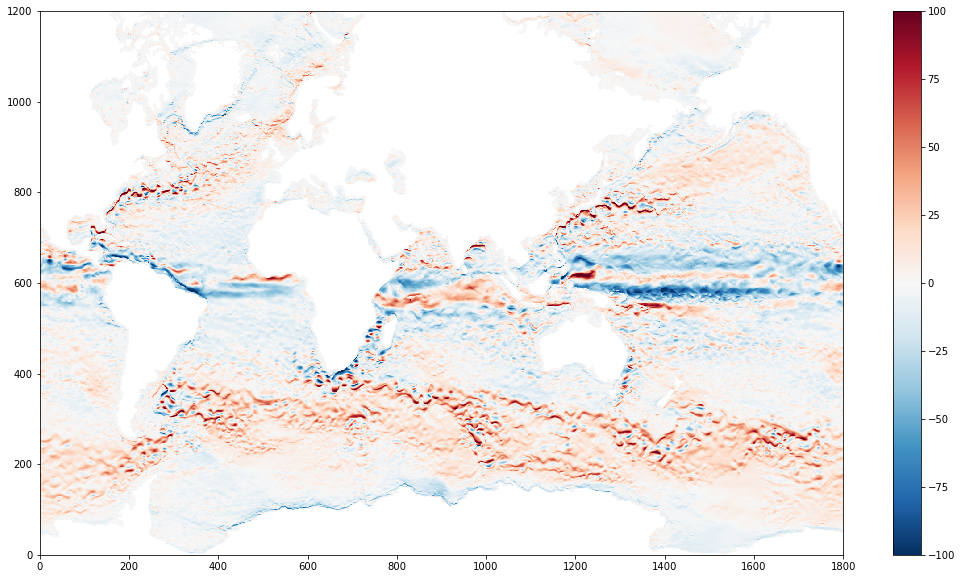

In [15]:
u_check = unstack(y_test[:, 0], ds.U.shape[1:], 2)

plt.figure(figsize=(18, 10))
plt.pcolormesh(u_check, cmap='RdBu_r')
plt.clim([-100, 100])
plt.colorbar()

In [16]:
U_pred = unstack(y_pred[:, 0], ds.U.shape[1:], 2)
V_pred = unstack(y_pred[:, 0], ds.U.shape[1:], 2)

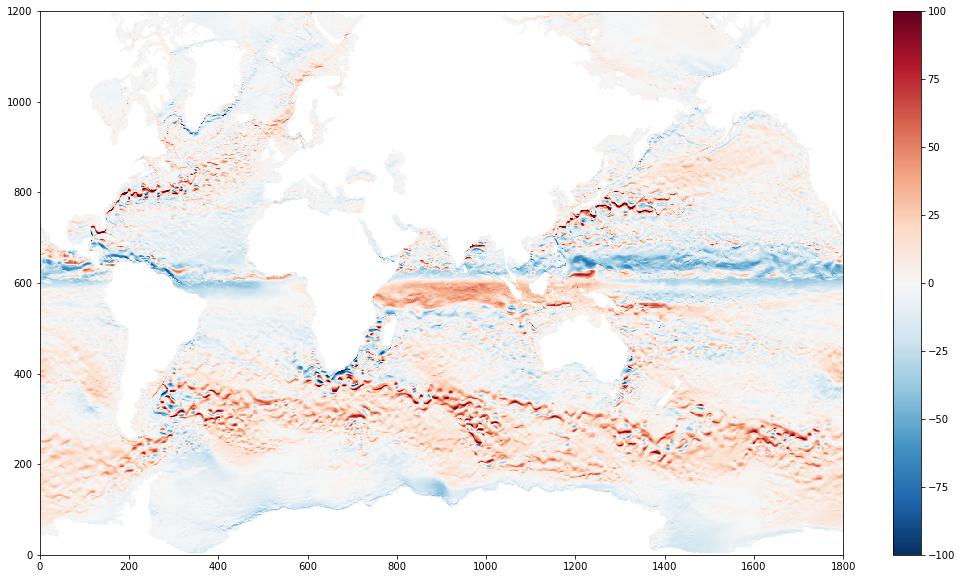

In [17]:
plt.figure(figsize=(18, 10))
plt.pcolormesh(U_pred, cmap='RdBu_r')
plt.clim([-100, 100])
plt.colorbar()